In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
data = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
data.work_type.value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [6]:
data.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [7]:
# Drop Null values
data.dropna(axis = 0, inplace = True)

In [8]:
data.shape

(4909, 12)

In [9]:
# Drop gender other
data.drop(data[data['gender'] == 'Other'].index, inplace = True)

In [10]:
data.gender.value_counts()

gender
Female    2897
Male      2011
Name: count, dtype: int64

In [11]:
data.drop(['id'], axis = 1, inplace = True)

### Visualize data

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Figure size 1000x600 with 0 Axes>

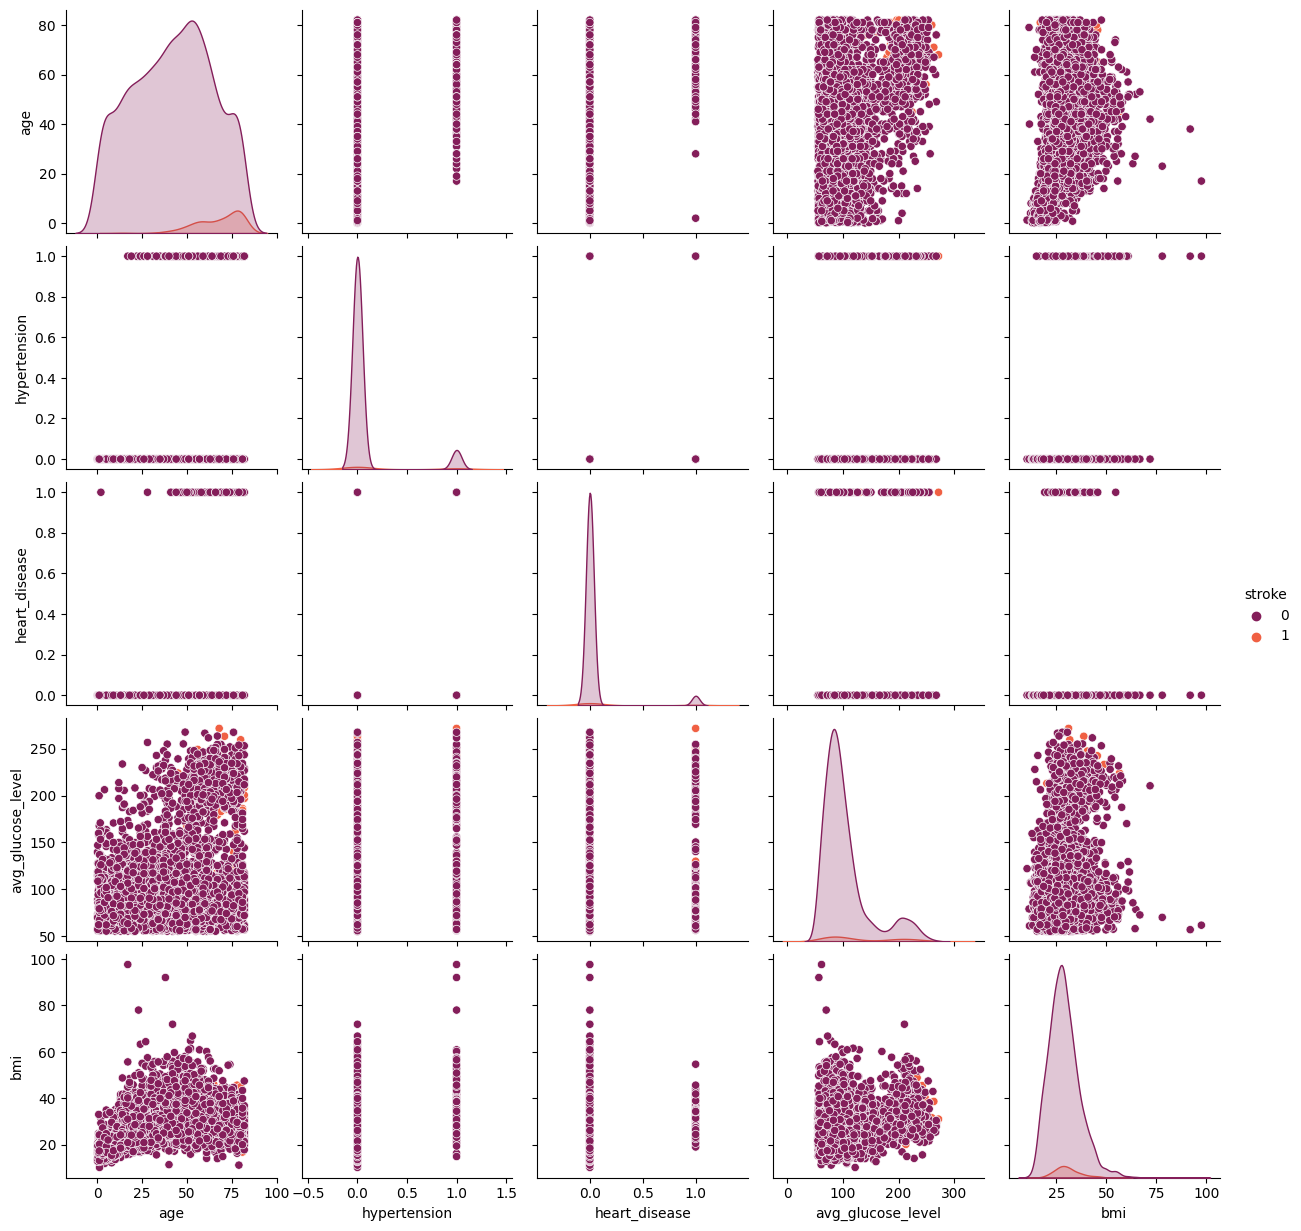

In [12]:
plt.figure(figsize = (10, 6))
sns.pairplot(data, hue = 'stroke', palette = 'rocket')

In [13]:
data.shape

(4908, 11)

In [14]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### Numerical Features

In [15]:
numerical = data.select_dtypes(include=['int64','float64']).columns.tolist()
numerical

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

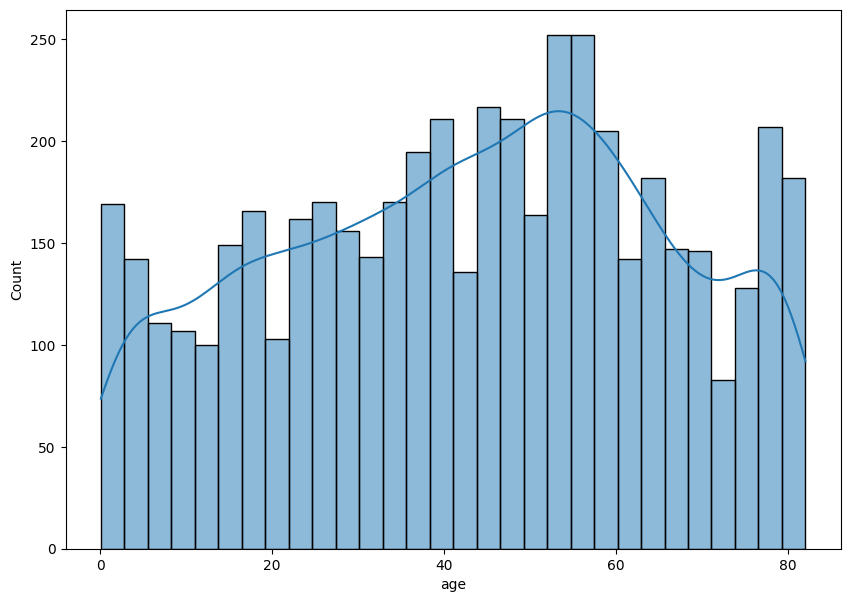

In [16]:
plt.figure(figsize = (10, 7))
sns.histplot(data.age, kde = True, bins = 30)

In [17]:
data[data.age < 1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
564,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
982,Male,0.88,0,0,No,children,Rural,157.57,19.2,Unknown,0
996,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
1093,Female,0.32,0,0,No,children,Rural,55.86,16.0,Unknown,0
1206,Female,0.72,0,0,No,children,Urban,66.36,23.0,Unknown,0
1317,Male,0.80,0,0,No,children,Rural,98.67,17.5,Unknown,0
1600,Male,0.40,0,0,No,children,Urban,109.56,14.3,Unknown,0
1614,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


In [18]:
data.work_type[data.age < 1] == 'children'

363     True
376     True
564     True
982     True
996     True
1093    True
1206    True
1317    True
1600    True
1614    True
1808    True
1975    True
1999    True
2008    True
2012    True
2358    True
2481    True
2490    True
2579    True
2630    True
2801    True
2875    True
2898    True
3251    True
3295    True
3392    True
3440    True
3618    True
3626    True
3859    True
3894    True
3968    True
4007    True
4021    True
4053    True
4293    True
4409    True
4581    True
4645    True
4910    True
4929    True
5089    True
Name: work_type, dtype: bool

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bmi', ylabel='Count'>

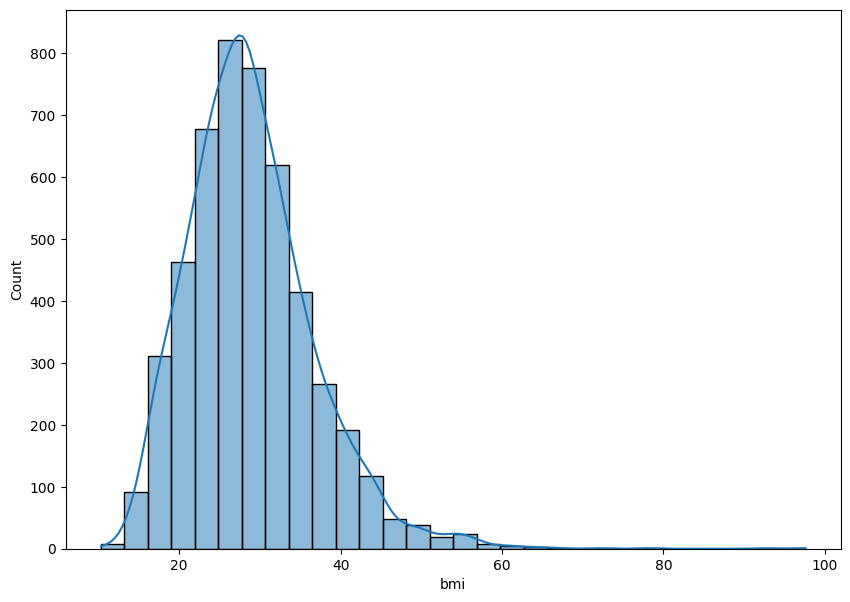

In [19]:
plt.figure(figsize = (10, 7))
sns.histplot(data.bmi, kde = True, bins = 30)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='avg_glucose_level', ylabel='Count'>

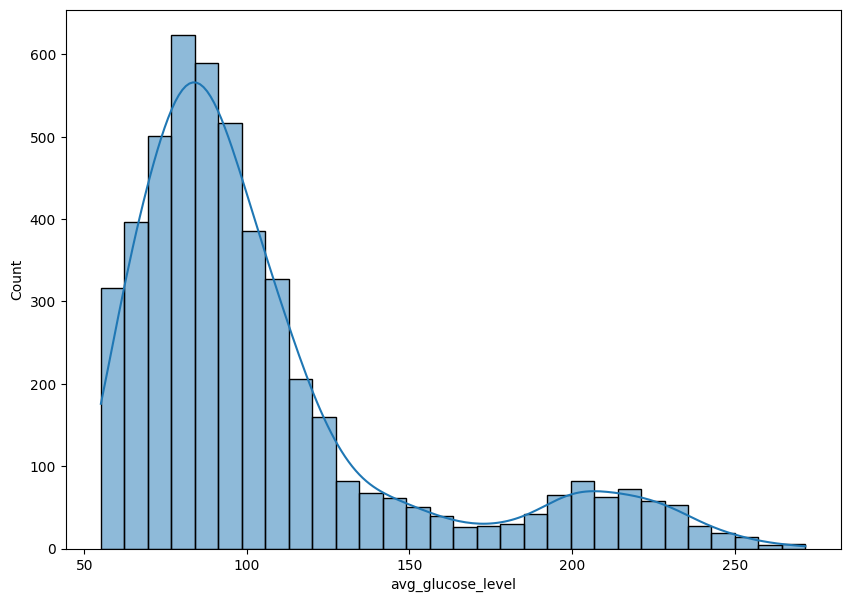

In [20]:
plt.figure(figsize = (10, 7))
sns.histplot(data.avg_glucose_level, kde = True, bins = 30)

In [21]:
data.hypertension.value_counts()

hypertension
0    4457
1     451
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7e79d1d9cb50>,
 [Text(-1.3420673016858036, 0.39856662899167394, 'No Hypertension'),
  Text(1.1503433774557923, -0.34162861991291216, 'Hypertension')],
 [Text(-0.8627575510837306, 0.2562214043517903, '90.8%'),
  Text(0.671033636849212, -0.1992833616158654, '9.2%')])

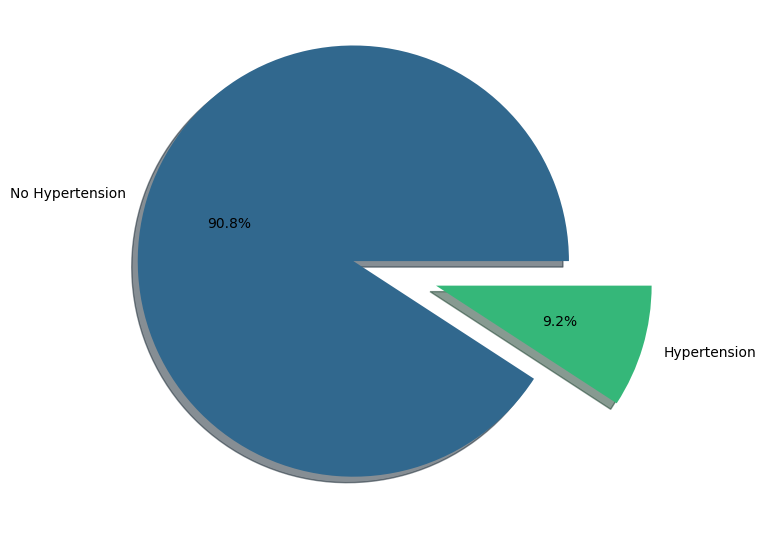

In [22]:
plt.figure(figsize = (10, 7))
plt.pie(data['hypertension'].value_counts(), labels = ['No Hypertension', 'Hypertension'],
       autopct = '%.1f%%', colors = sns.color_palette('viridis', 2), explode = (0.3, 0.1),
       shadow = True) 

In [23]:
data.stroke.value_counts()

stroke
0    4699
1     209
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7e79d1ddbb80>,
 [Text(-1.3874906946982406, 0.18673396082607518, 'No Stroke'),
  Text(1.1892777439324074, -0.1600576389524832, 'Stroke')],
 [Text(-0.8919583037345831, 0.12004326053104832, '95.7%'),
  Text(0.6937453506272375, -0.0933669560556152, '4.3%')])

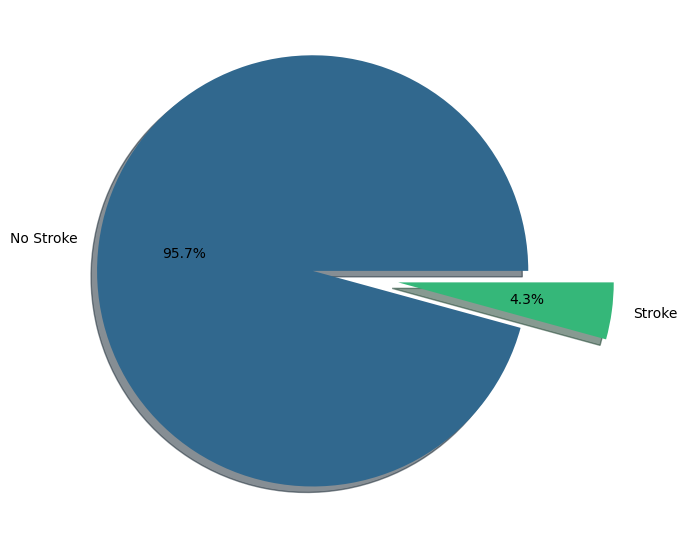

In [24]:
plt.figure(figsize = (10, 7))
plt.pie(data['stroke'].value_counts(), labels = ['No Stroke', 'Stroke'],
       autopct = '%.1f%%', colors = sns.color_palette('viridis', 2), explode = (0.3, 0.1),
       shadow = True)

In [25]:
data.heart_disease.value_counts()

heart_disease
0    4665
1     243
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7e79d1e36a40>,
 [Text(-1.3830984834906772, 0.21688380521788447, 'No Heart Disease'),
  Text(1.1855129793221817, -0.18590044609587314, 'Heart Disease')],
 [Text(-0.8891347393868638, 0.1394253033543543, '95.0%'),
  Text(0.6915492379379392, -0.10844192688925931, '5.0%')])

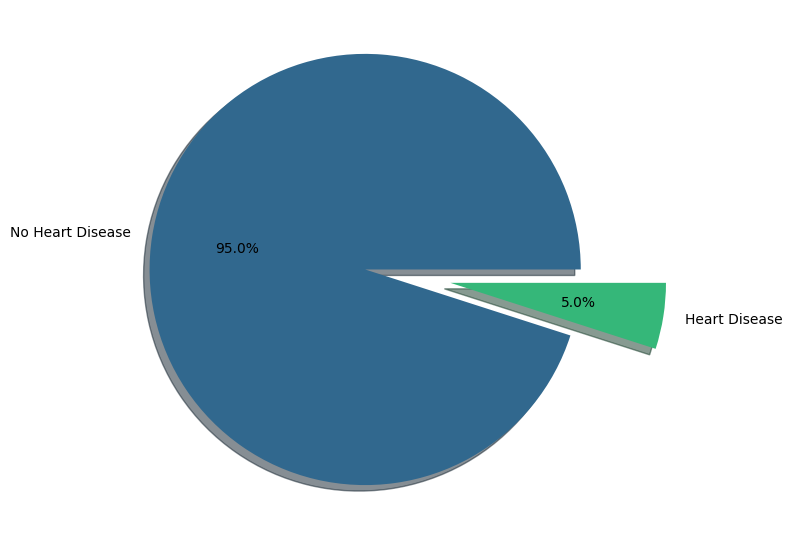

In [26]:
plt.figure(figsize = (10, 7))
plt.pie(data['heart_disease'].value_counts(), labels = ['No Heart Disease', 'Heart Disease'],
       autopct = '%.1f%%', colors = sns.color_palette('viridis', 2), explode = (0.3, 0.1),
       shadow = True)

### Check the outlier

<Axes: >

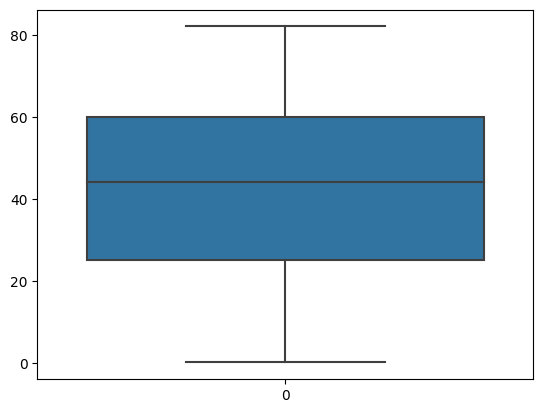

In [27]:
sns.boxplot(data.age)

<Axes: >

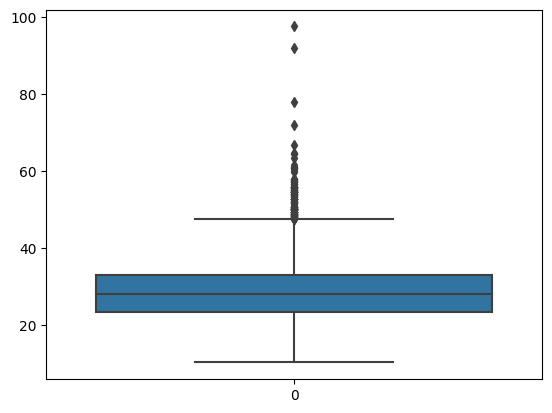

In [28]:
sns.boxplot(data.bmi)

<Axes: >

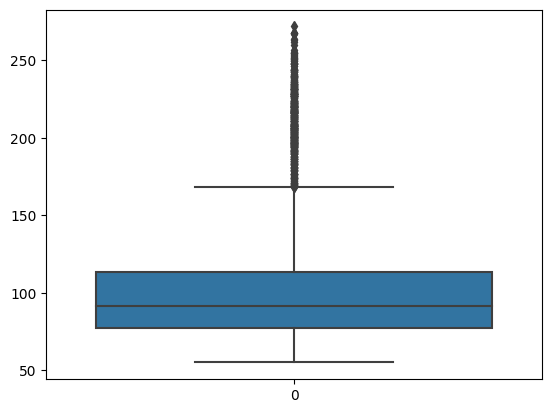

In [29]:
sns.boxplot(data.avg_glucose_level)

In [30]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [31]:
numerical[:-1]

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [32]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data[numerical[:-1]] = ss.fit_transform(data[numerical[:-1]])

In [33]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4.908000e+03,4.908000e+03,4.908000e+03,4.908000e+03,4.908000e+03,4908.000000
mean,-4.632715e-17,-1.447724e-17,-2.026813e-17,-1.273997e-16,1.534587e-16,0.042584
std,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,0.201937
min,-1.897186e+00,-3.181024e-01,-2.282324e-01,-1.129587e+00,-2.367672e+00,0.000000
25%,-7.922739e-01,-3.181024e-01,-2.282324e-01,-6.355077e-01,-6.868971e-01,0.000000
50%,5.015511e-02,-3.181024e-01,-2.282324e-01,-3.065531e-01,-1.011725e-01,0.000000
75%,7.595690e-01,-3.181024e-01,-2.282324e-01,1.845432e-01,5.354848e-01,0.000000
max,1.735013e+00,3.143642e+00,4.381499e+00,3.746933e+00,8.748363e+00,1.000000


### Categorical features

In [34]:
categorical = data.select_dtypes(include = 'object').columns.tolist()
categorical

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [35]:
data.gender.value_counts()

gender
Female    2897
Male      2011
Name: count, dtype: int64

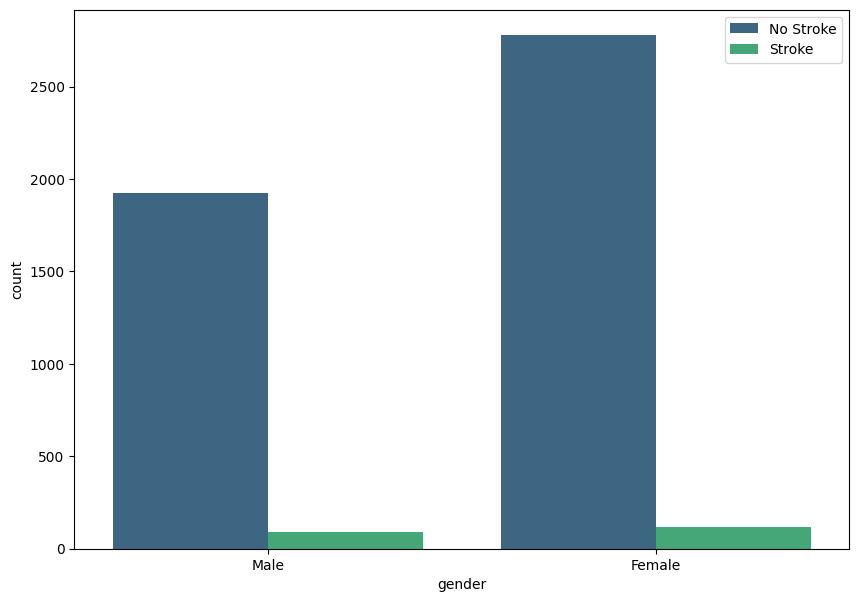

In [36]:
# visualize gender
plt.figure(figsize = (10, 7))
sns.countplot(data, x = 'gender', palette = 'viridis', hue = 'stroke')
plt.legend(['No Stroke', 'Stroke'])

In [37]:
# mapping column gender
data.gender = data.gender.map({
    'Male' : 0,
    'Female' : 1
})

In [38]:
data.ever_married.value_counts()

ever_married
Yes    3204
No     1704
Name: count, dtype: int64

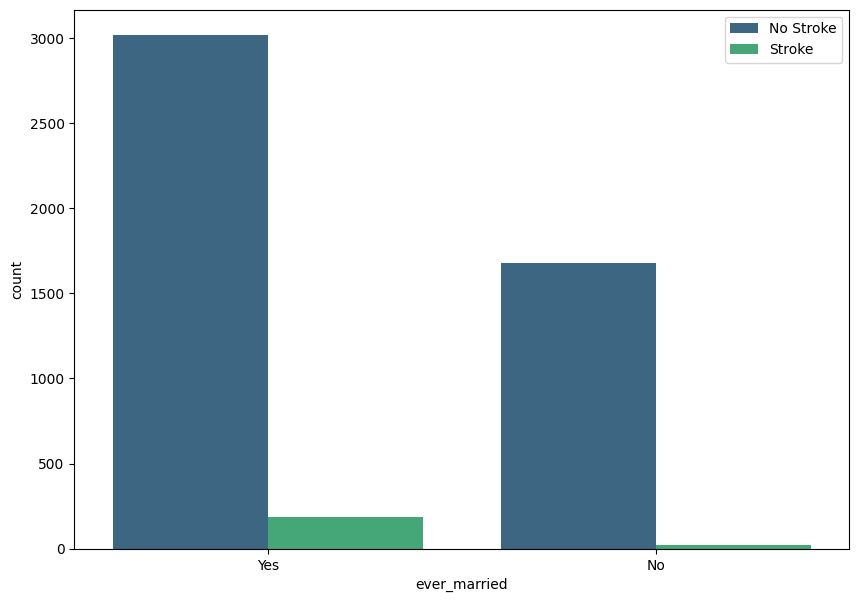

In [39]:
# visualize column ever married
plt.figure(figsize = (10, 7))
sns.countplot(data, x = 'ever_married', palette = 'viridis', hue = 'stroke')
plt.legend(['No Stroke', 'Stroke'])

In [40]:
# mapping column gender
data.ever_married = data.ever_married.map({
    'No' : 0,
    'Yes' : 1
})

In [41]:
data.work_type.value_counts()

work_type
Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: count, dtype: int64

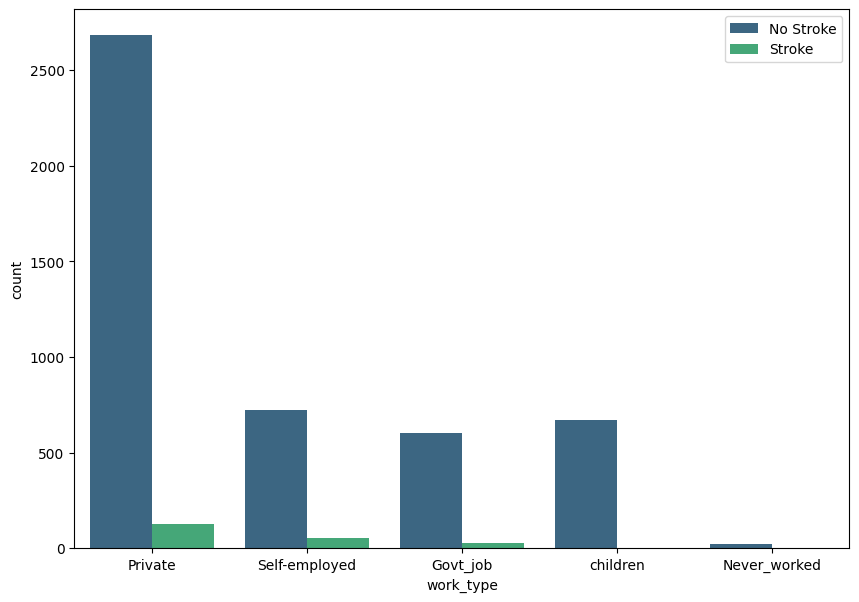

In [42]:
# visualize column work_type
plt.figure(figsize = (10, 7))
sns.countplot(data, x = 'work_type', palette = 'viridis', hue = 'stroke')
plt.legend(['No Stroke', 'Stroke'])

In [43]:
# mapping column work type
data.work_type = data.work_type.map({
    'Private' : 0,
    'Self-employed' : 1,
    'Govt_job' : 2,
    'children' : 3,
    'Never_worked' : 4
})

In [44]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,1.069938,-0.318102,4.381499,1,0,Urban,2.777797,0.981145,formerly smoked,1
2,0,1.646336,-0.318102,4.381499,1,0,Rural,0.014016,0.459086,never smoked,1
3,1,0.271847,-0.318102,-0.228232,1,0,Urban,1.484266,0.701016,smokes,1
4,1,1.601998,3.143642,-0.228232,1,1,Rural,1.549325,-0.623231,never smoked,1
5,0,1.690675,-0.318102,-0.228232,1,0,Urban,1.821493,0.013426,formerly smoked,1


In [45]:
data.Residence_type.value_counts()

Residence_type
Urban    2490
Rural    2418
Name: count, dtype: int64

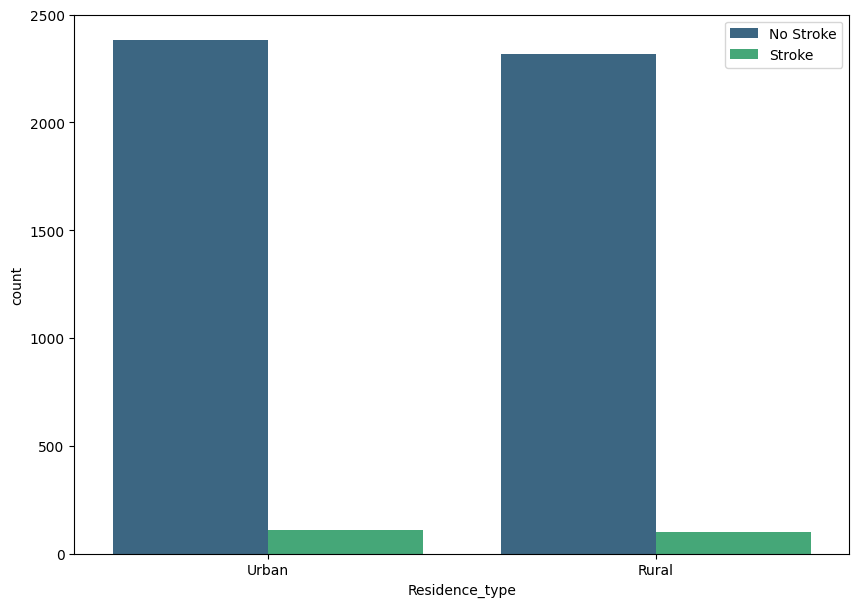

In [46]:
# visualize column residence type
plt.figure(figsize = (10, 7))
sns.countplot(data, x = 'Residence_type', palette = 'viridis', hue = 'stroke')
plt.legend(['No Stroke', 'Stroke'])

In [47]:
# mapping column residence type
data.Residence_type = data.Residence_type.map({
    'Urban' : 0,
    'Rural' : 1
})

In [48]:
data.smoking_status.value_counts()

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: count, dtype: int64

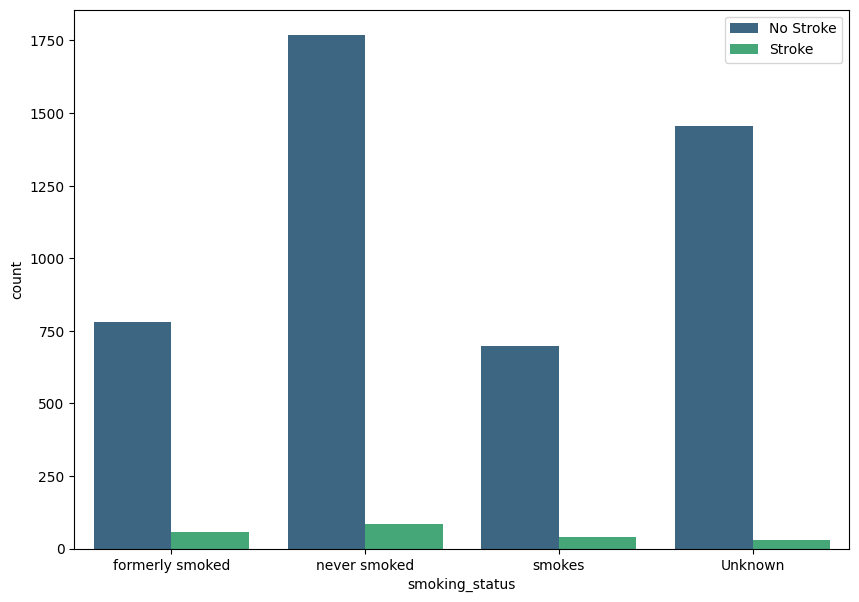

In [49]:
# visualize column residence type
plt.figure(figsize = (10, 7))
sns.countplot(data, x = 'smoking_status', palette = 'viridis', hue = 'stroke')
plt.legend(['No Stroke', 'Stroke'])

In [50]:
# mapping column smoking status
data.smoking_status = data.smoking_status.map({
    'formerly smoked' : 0,
    'never smoked' : 1,
    'smokes' : 2,
    'Unknown' : 3
})

In [51]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,1.069938,-0.318102,4.381499,1,0,0,2.777797,0.981145,0,1
2,0,1.646336,-0.318102,4.381499,1,0,1,0.014016,0.459086,1,1
3,1,0.271847,-0.318102,-0.228232,1,0,0,1.484266,0.701016,2,1
4,1,1.601998,3.143642,-0.228232,1,1,1,1.549325,-0.623231,1,1
5,0,1.690675,-0.318102,-0.228232,1,0,0,1.821493,0.013426,0,1


### Check the Correlation between feature

<Axes: >

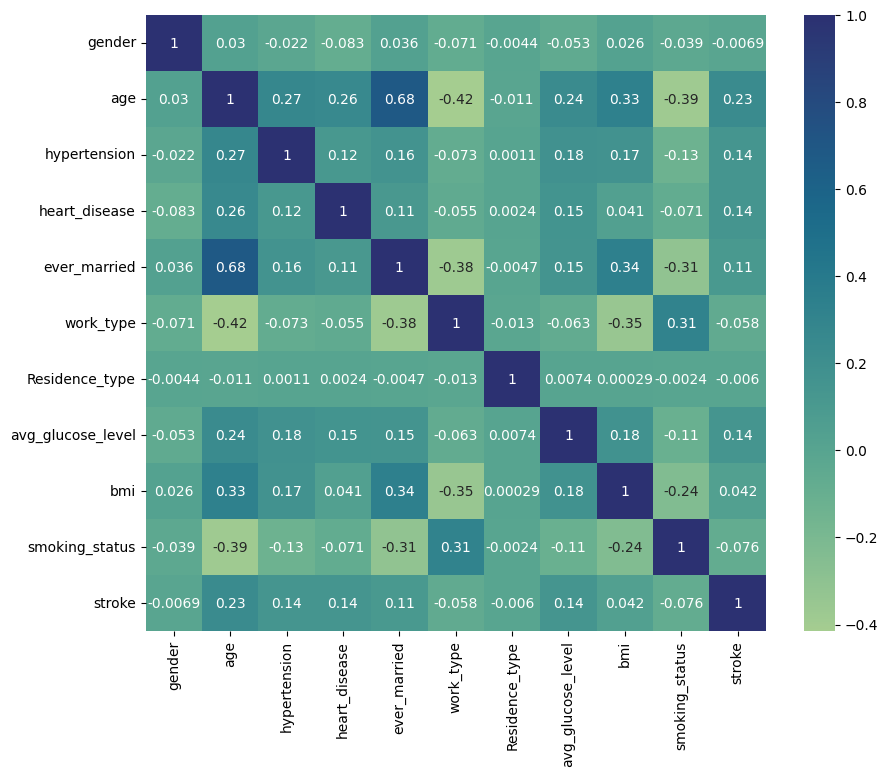

In [52]:
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr(), annot = True, cmap = 'crest')

In [53]:
X = data.drop('stroke', axis = 1) # Features
y = data.stroke
X.shape, y.shape

((4908, 10), (4908,))

## train a model on imbalanced data

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [55]:
X_train_imbal, X_test_imbal, y_train_imbal, y_test_imbal = train_test_split(
    X, y, test_size = 0.1, random_state = 42
)

In [56]:
# Model with decision tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

model_0 = DecisionTreeClassifier(random_state = 1234)
model_0.fit(X_train_imbal, y_train_imbal)
y_pred_0 = model_0.predict(X_test_imbal)
print(classification_report(y_test_imbal, y_pred_0))
cm = confusion_matrix(y_test_imbal, y_pred_0, labels = model_0.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm,
                      display_labels = model_0.classes_)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       465
           1       0.12      0.12      0.12        26

    accuracy                           0.91       491
   macro avg       0.54      0.54      0.54       491
weighted avg       0.91      0.91      0.91       491



In [57]:
cn = cm.ravel()

# Extract TP, TN, FP, and FN
tp, fn, fp, tn = cn

print("True Positive:", tp)
print("False Positive:", fp)
print("True Negative:", tn)
print("False Negative:", fn)

True Positive: 444
False Positive: 23
True Negative: 3
False Negative: 21


In [58]:
# Model with random forest
model_1 = RandomForestClassifier(random_state = 1234)
model_1.fit(X_train_imbal, y_train_imbal)
y_pred_1 = model_1.predict(X_test_imbal)
print(classification_report(y_test_imbal, y_pred_1))
cm = confusion_matrix(y_test_imbal, y_pred_1, labels = model_1.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm,
                      display_labels = model_1.classes_)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       465
           1       0.00      0.00      0.00        26

    accuracy                           0.95       491
   macro avg       0.47      0.50      0.49       491
weighted avg       0.90      0.95      0.92       491



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Train model on balanced data

In [59]:
!pip install imbalanced-learn

In [60]:
# check version number
import imblearn
print(imblearn.__version__)

0.12.0


In [61]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_resample, y_resample = smote.fit_resample(X, y)

print(X_resample.shape, y_resample.shape)

(9398, 10) (9398,)


In [62]:
# preview target value
y_resample.value_counts()

stroke
1    4699
0    4699
Name: count, dtype: int64

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resample, y_resample,
    test_size = 0.1, random_state = 42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8458, 10), (940, 10), (8458,), (940,))

In [64]:
# Model Decision Tree
model_3 = DecisionTreeClassifier(random_state = 1234)
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)
print(classification_report(y_test, y_pred_3))
cm = confusion_matrix(y_test, y_pred_3, labels = model_3.classes_)
ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = model_3.classes_)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       477
           1       0.88      0.87      0.87       463

    accuracy                           0.88       940
   macro avg       0.88      0.88      0.88       940
weighted avg       0.88      0.88      0.88       940



In [65]:
# Model with Random_forest
model_4 = RandomForestClassifier()
model_4.fit(X_train, y_train)
y_pred_4 = model_4.predict(X_test)
print(classification_report(y_test, y_pred_4))
cm = confusion_matrix(y_test, y_pred_4, labels = model_4.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_4.classes_)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       477
           1       0.94      0.96      0.95       463

    accuracy                           0.95       940
   macro avg       0.95      0.95      0.95       940
weighted avg       0.95      0.95      0.95       940

